<a href="https://colab.research.google.com/github/JamesEdMichaud/cs480student/blob/main/05/Michaud_CS697_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

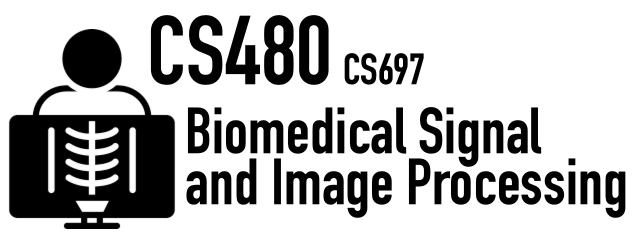
#Assignment 5

In [198]:
# In this assignment, we will visualize and explore a CT scan!

In [199]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [200]:
# we are using pydicom, so lets install it!
!pip install pydicom

**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [201]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [202]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [203]:
# TODO: 220, based on the number of files.

In [204]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [205]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

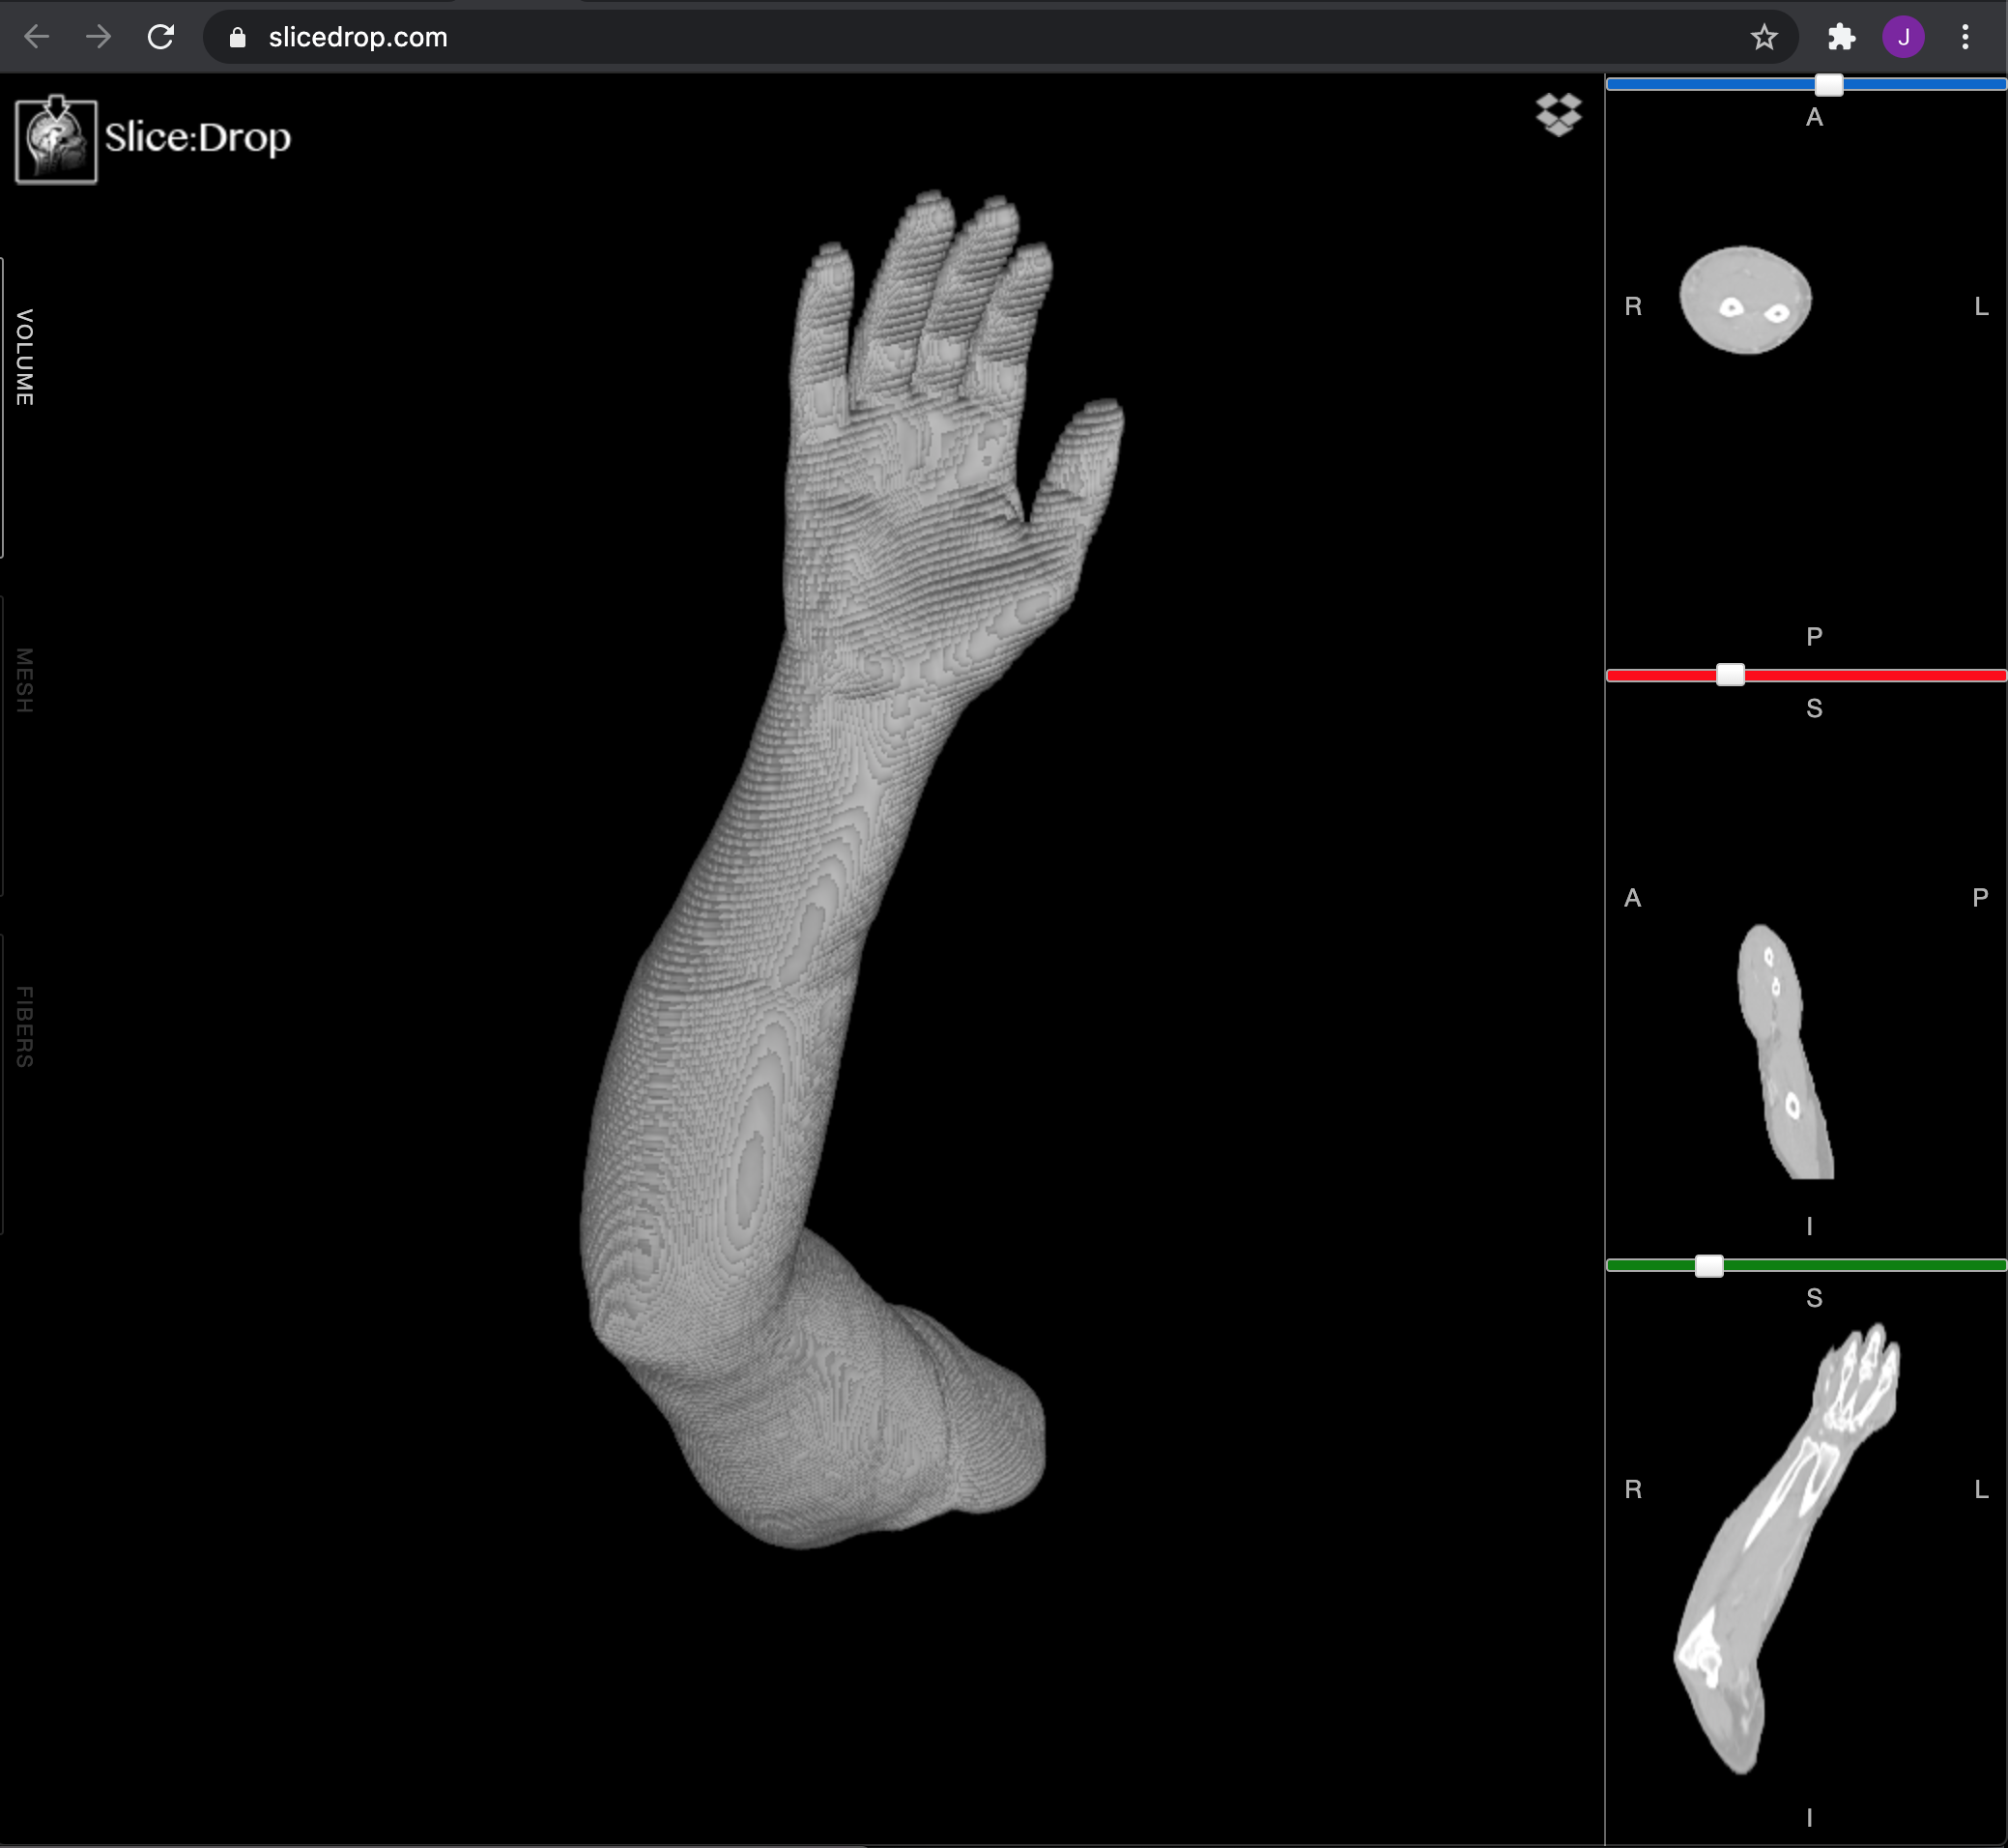

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [206]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [207]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [208]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [209]:
from pydicom import dcmread

In [210]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import os

dir = "./ct/"
filenames = os.listdir(dir)
filenames.sort()

shape = dcmread(dir + filenames[0]).pixel_array.shape
print(shape)
data = np.zeros((len(filenames),) + shape)

for i in range(len(filenames)):
  data[i] = dcmread(dir + filenames[i]).pixel_array

(454, 512)


In [211]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

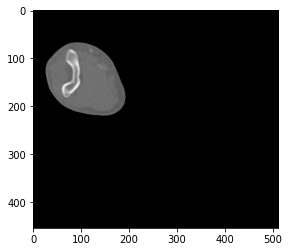

In [212]:
# TODO: YOUR CODE FOR AXIAL
imshow(data[150,:,:], cmap='gray')

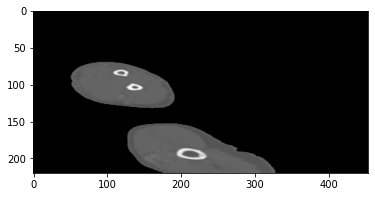

In [213]:
# TODO: YOUR CODE FOR SAGITTAL
imshow(data[:,:,200], cmap='gray')

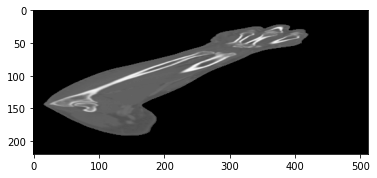

In [214]:
# TODO: YOUR CODE FOR CORONAL
imshow(data[:,120,:], cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [215]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [216]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

Window Center    :     30
Window Width     :    410
Rescale Intercept:  -1024
Rescale Slope    :      1.000000


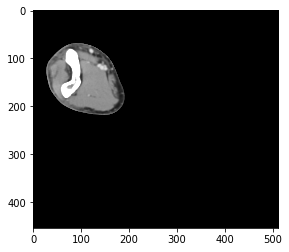

In [217]:
# TODO: YOUR CODE
currFile = dcmread(dir + filenames[150])
level   = currFile[0x0028, 0x1050].value
window  = currFile[0x0028, 0x1051].value
rescale = currFile[0x0028, 0x1052].value
slope   = currFile[0x0028, 0x1053].value
print("Window Center    :    ", level)
print("Window Width     :   ", window)
print("Rescale Intercept: ", rescale)
print("Rescale Slope    :     ", slope)

hu_pixels = currFile.pixel_array * slope

vmin = level - window/2
vmax = level + window/2
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [218]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

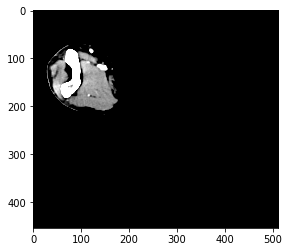

In [219]:
# TODO: YOUR CODE
level2 = 50
window2 = 100
vmin2 = level2 - window2/2
vmax2 = level2 + window2/2
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin2, vmax=vmax2)
plt.show()

In [220]:
# Which values make sense and why?

In [221]:
# TODO: YOUR ANSWER

# Which values make sense highly depends on the intended outcome of applying
# the adjustment. If bone is to emphasized, a much higher level value should be
# used, as the intensity of bone pixels is much higher than that of other tissue.
# Additionally, the window should be wider, as bone is the dominating feature
# at such intensities and a wider window will not cause other tissue to be
# overly bright. 

# On the other hand, to emphasize tissue the level should be much lower
# (relative to bone) and the window more narrow so as to isolate the desired
# tissue. Above I chose to increase the level slightly while reducing the window
# window significantly. This brings out some additional tissue detail without
# washing out the image too much.

# Thresholding can be applied to further enhance the visibility of tissue. In
# particular, pixels above a certain threshold can be blacked out, which would
# hide the bone and possibly make tissue easier to distinguish.
# Hah! I should have read the bonus question before answering this. Leaving it :)

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [222]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [243]:
# Common function
def makeAndDisplayMask(pixels, thresholdLo, thresholdHi):
  masked = pixels.copy() + rescale
  # using rescale (-1024) instead of 0 due to HU values being negative
  masked[masked < thresholdLo] = rescale
  masked[masked > thresholdHi] = rescale
  plt.figure()
  plt.imshow(masked, cmap="gray")

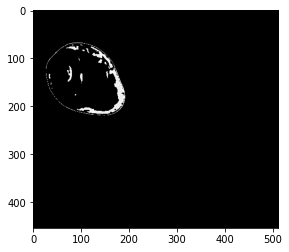

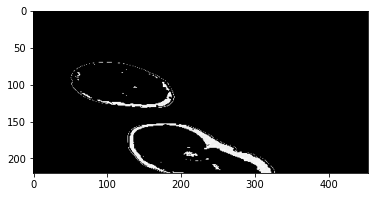

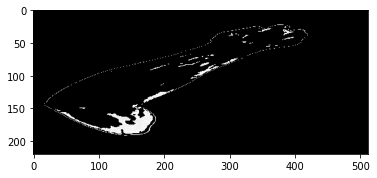

In [245]:
# TODO: YOUR CODE TO SEGMENT FAT

# According to Wikipedia, fat HU values fall between -120 and -90
# Expanding that a bit here for added visibility

fatRangeLow = -200
fatRangeHigh = -50

makeAndDisplayMask(data[150,:,:], fatRangeLow, fatRangeHigh)
makeAndDisplayMask(data[:,:,200], fatRangeLow, fatRangeHigh)
makeAndDisplayMask(data[:,120,:], fatRangeLow, fatRangeHigh)

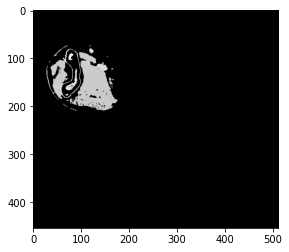

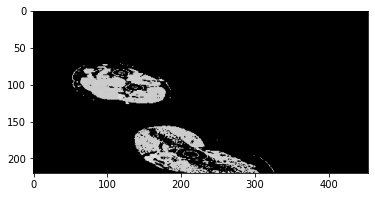

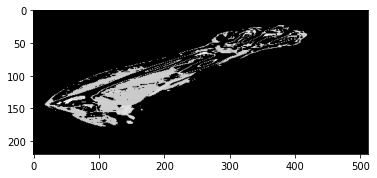

In [246]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

# According to Wikipedia, soft tissue HU values fall between 100 and 300
# Expanding that a bit here for added visibility

tissueRangeLow = 50
tissueRangeHigh = 350

makeAndDisplayMask(data[150,:,:], tissueRangeLow, tissueRangeHigh)
makeAndDisplayMask(data[:,:,200], tissueRangeLow, tissueRangeHigh)
makeAndDisplayMask(data[:,120,:], tissueRangeLow, tissueRangeHigh)

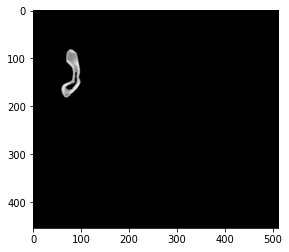

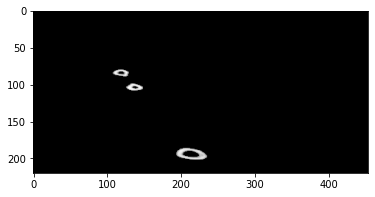

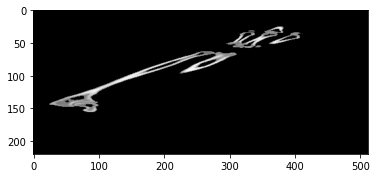

In [247]:
# TODO: YOUR CODE TO SEGMENT BONES

# Again according to Wikipedia, bone HU values fall between 300 and 1900
# Expanding that a bit here for added visibility

boneRangeLow = 250
boneRangeHigh = 2000

makeAndDisplayMask(data[150,:,:], boneRangeLow, boneRangeHigh)
makeAndDisplayMask(data[:,:,200], boneRangeLow, boneRangeHigh)
makeAndDisplayMask(data[:,120,:], boneRangeLow, boneRangeHigh)

In [226]:
# Are the segmentations good?

In [227]:
# TODO: YOUR ANSWER

# For a quick and easy few lines of code it's not bad at all. The wide range
# of density values in the HU scale allows for some really effective segmentation.
# However, simply isolating each type of tissue/bone doesn't provide a 
# comprehensive view of the CT images. Color segmentation might highlight the
# desired tissue while leaving everything else visible for context. 

In [228]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""